In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

CUR_DIR = Path('__file__').resolve().parent

dataframe = pd.read_csv(f'{CUR_DIR}/Sysarmy.csv', encoding='utf-8', delimiter=';')

In [194]:
df_caba = dataframe[dataframe['Dónde estás trabajando']=='Ciudad Autónoma de Buenos Aires']
df_caba.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Estado,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género)
82,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis
83,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
84,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000,283700,NaN,NaN,NaN,NaN,...,En curso,Licenciatura en Informática,UP - Universidad de Palermo,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,25,Varón Cis
85,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1700000,1200000,Mi sueldo está dolarizado (pero cobro en moned...,314,NaN,NaN,...,Incompleto,Ingeniería en Informática,UAI - Universidad Abierta Interamericana,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,37,Varón Cis
86,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1170000,610000,Cobro parte del salario en dólares,170,NaN,NaN,...,Incompleto,Lic en ciencias matemáticas,UBA - Universidad de Buenos Aires,no,NaN,No,0.0,Bruto,28,Varón Cis


In [221]:
df_caba['Dónde estás trabajando'].size

3262

In [235]:
df_data = df_caba[df_caba['Trabajo de'].str.contains('Developer', na=False)]
df_data.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Estado,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género)
82,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis
83,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
84,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000,283700,NaN,NaN,NaN,NaN,...,En curso,Licenciatura en Informática,UP - Universidad de Palermo,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,25,Varón Cis
92,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),420000,260000,NaN,NaN,NaN,NaN,...,En curso,Licenciatura en Informática,UNQ - Universidad Nacional de Quilmes,No,NaN,NaN,NaN,NaN,40,Varón Cis
94,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),120000,100000,NaN,NaN,NaN,NaN,...,En curso,Ingeniería en Informática,UBA - Universidad de Buenos Aires,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,25,Varón Cis


In [125]:
def reformat_salary_column(salario):
    """Remueve los carácteres no numéricos de la columna salario.
    Convierte los valores originalmente de tipo string a numérico y filtra el rango esperado,
    seteando los valores fuera de rango en nan.
    """
    
    pattern = '|'.join(['-', '$', ' ', 'ARS', ',', 'pesos', 'USD', 'k', 'ars', '\.', '$', 'argentinos'])

    check1 = salario.str.replace(pattern, '', regex=True)
    check2 = check1.replace(pattern, '', regex=True)
    check2 = pd.to_numeric(check2)
    salario = check2
    salario

    salario = np.where(salario<1000, salario*1000, salario)
    salario = np.where(salario<50000, np.nan, salario)
    salario = np.where(salario>=1000000, np.nan, salario)
    salario = np.where(salario==0, np.nan, salario)

    return salario

In [4]:
df_data1 = df_data[df_data['Años de experiencia']<=1]
df_data1.head()
df_data1['Años de experiencia'].size

253

In [5]:
import numpy as np
df_data1['Años'] = np.where(df_data1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\77575764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1['Años'] = np.where(df_data1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


In [6]:
df_fulltime = df_data1[df_data1['Dedicación'] == 'Full-Time']
df_fulltime.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género),Años
83,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,0 años de experiencia
102,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),167000,144000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis,1 año de experiencia
124,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),200,160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis,0 años de experiencia
125,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),150000,120000,NaN,NaN,NaN,NaN,...,Licenciatura en Informática,UNGS - Universidad Nacional de General Sarmiento,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,1 año de experiencia
128,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),91000,79000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis,1 año de experiencia


In [9]:

rows = [79,85,157,168,199,207]
for row in rows:
    df_fulltime.drop(df_fulltime.iloc[row].name, inplace=True)

C:\Users\Mauro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)'].size

218

In [24]:
np.max(df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)'])

672246.0

Text(0.5, 0, 'Años de experiencia')

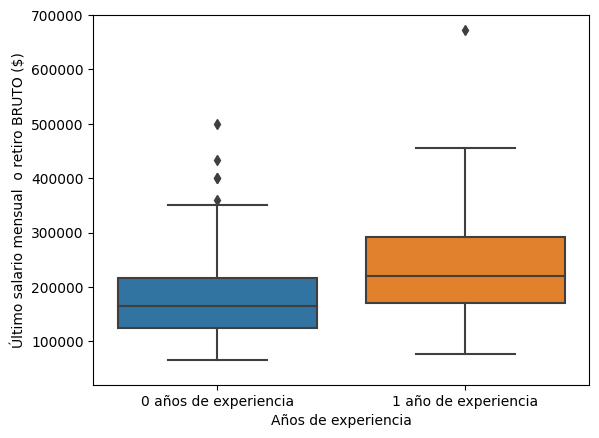

In [28]:
import seaborn as sns
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=df_fulltime)
ax.set(ylim=(20000, 700000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

Salario medio:212657, Minimo salario: 65000.0, Maximo salario: 672246.0


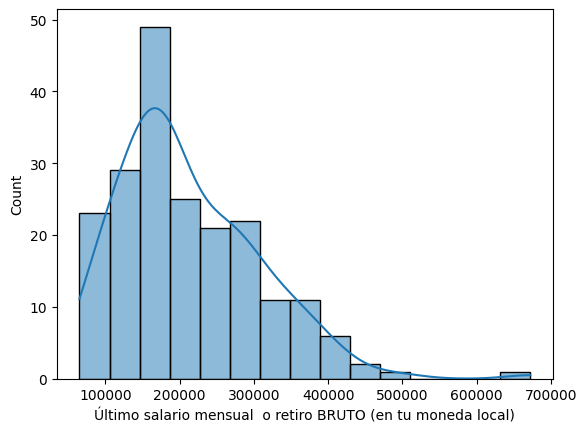

In [60]:
salario = df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)']
sns.histplot(data=df_fulltime, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)


print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [197]:
conditions = [
    (df_data['Años de experiencia'] <= 2),
    (df_data['Años de experiencia'] > 2) & (df_data['Años de experiencia'] <= 5),
    (df_data['Años de experiencia'] > 5) & (df_data['Años de experiencia'] <= 10),
    (df_data['Años de experiencia'] > 10)
    ]

values = ['2 o menos', '3 á 5', '6 á 10', 'Más de 10']

df_data['Años experiencia'] = np.select(conditions, values)

df_data.head()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\1823813411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Años experiencia'] = np.select(conditions, values)


,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género),Años experiencia
82,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis,2 o menos
83,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,2 o menos
84,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000,283700,NaN,NaN,NaN,NaN,...,Licenciatura en Informática,UP - Universidad de Palermo,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,25,Varón Cis,3 á 5
92,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),420000,260000,NaN,NaN,NaN,NaN,...,Licenciatura en Informática,UNQ - Universidad Nacional de Quilmes,No,NaN,NaN,NaN,NaN,40,Varón Cis,3 á 5
94,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),120000,100000,NaN,NaN,NaN,NaN,...,Ingeniería en Informática,UBA - Universidad de Buenos Aires,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,25,Varón Cis,2 o menos


In [198]:
rows = [70,160,246,361,406,457,589,591,679,732,777,792,803,852,853,854,855,883,979,994,1017,1087]
for row in rows:
    df_data.drop(df_data.iloc[row].name, inplace=True)

C:\Users\Mauro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [203]:
sal = reformat_salary_column(df_data['Último salario mensual  o retiro BRUTO (en tu moneda local)'])
sal


array([260000., 106350., 339000., ..., 400000., 330000., 250000.])

In [204]:
df_data['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = sal

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\3410978119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = sal


Text(0.5, 0, 'Años de experiencia')

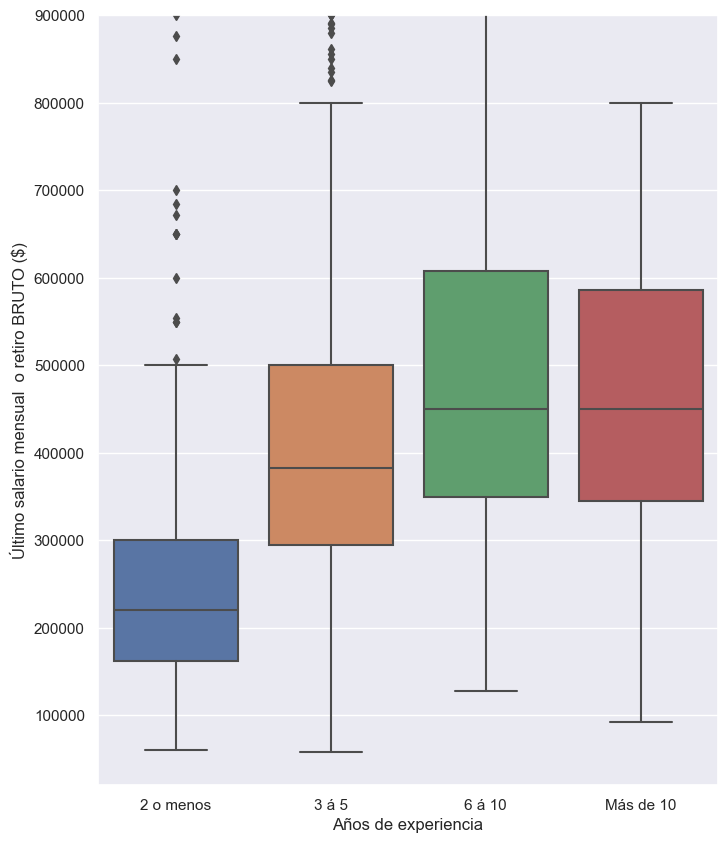

In [208]:
ax = sns.boxplot(x='Años experiencia', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', order = ['2 o menos', '3 á 5', '6 á 10', 'Más de 10'], data=df_data)
ax.set(ylim=(20000, 900000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

In [50]:
engineer = dataframe[dataframe['Trabajo de'].str.contains('Data Engineer', na=True)]
engineer1 = engineer[engineer['Años de experiencia']<=1]
engineer1.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Estado,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género)
13,Argentina,Chaco,Full-Time,Staff (planta permanente),175000,145000,NaN,NaN,NaN,NaN,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Alkemy,Python + Data Analytics,No,0.0,Neto,28,Varón Cis
42,Argentina,Chaco,Full-Time,Staff (planta permanente),287000,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Varón Cis
123,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),330000,240000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis
278,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),114000,93000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
279,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),111000,92000,NaN,NaN,NaN,NaN,...,Completo,Profesorado ciencias sociales,UBA - Universidad de Buenos Aires,NaN,NaN,NaN,NaN,NaN,37,Mujer Cis


In [52]:
salario = reformat_salary_column(engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)'])


In [54]:
engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario
engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\1707423683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario


13      175000.0
42      287000.0
123     330000.0
278     114000.0
279     111000.0
310     270000.0
995     468000.0
1352    260000.0
1405    150173.0
1541    200000.0
2089    233000.0
2331    690000.0
2402    270000.0
2425    280751.0
2825    228000.0
3116         NaN
3190    300000.0
3424    165000.0
3467    380000.0
3494    135000.0
3523    198000.0
3663    265000.0
3680    160000.0
3882    231000.0
3885    240000.0
3887    138500.0
4013    147000.0
4120    214000.0
4150    330000.0
4167    240000.0
4333    596000.0
4343    445000.0
4397    440000.0
4505    300571.0
4707    342000.0
4883    700000.0
5260    160000.0
5383         NaN
5385    220000.0
5411    290000.0
5568    650000.0
6027    294300.0
6075    790000.0
6370    162500.0
6405    150000.0
6421    210000.0
6686    155000.0
Name: Último salario mensual  o retiro BRUTO (en tu moneda local), dtype: float64

Salario medio:291462, Minimo salario: 111000.0, Maximo salario: 790000.0


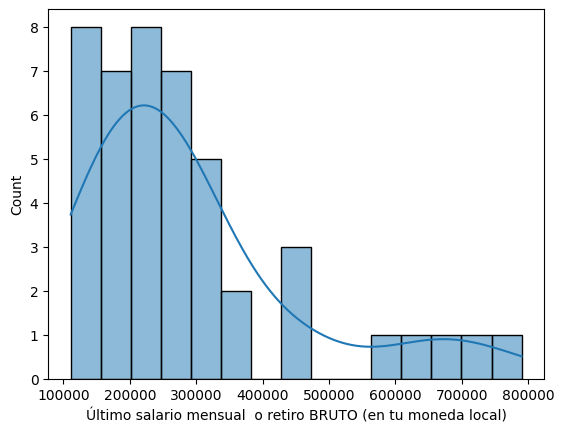

In [59]:
sns.histplot(data=engineer1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)


print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [61]:
engineer1['Años'] = np.where(engineer1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\3354579835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineer1['Años'] = np.where(engineer1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

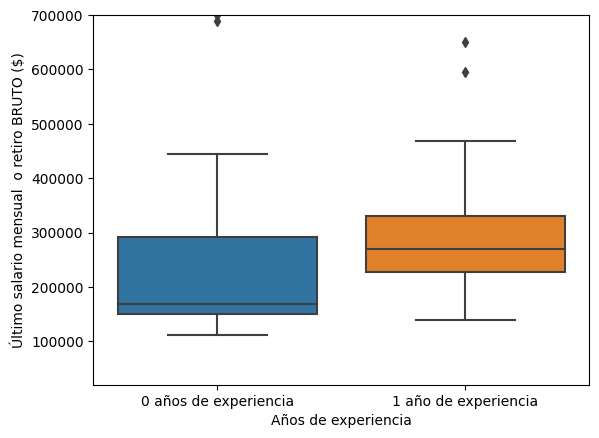

In [62]:
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=engineer1)
ax.set(ylim=(20000, 700000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

In [224]:
scientist = dataframe[dataframe['Trabajo de'].str.contains('Data Scientist', na=True)]
scientist1 = scientist[scientist['Años de experiencia']<=1]
scientist.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Estado,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género)
22,Argentina,Chaco,Full-Time,Staff (planta permanente),409303,337458,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en Física,UNNNE - Universidad Nacional del Nordeste,No,NaN,NaN,NaN,NaN,35,Mujer Cis
96,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),441000,281000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Varón Cis
97,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260500,220500,NaN,NaN,NaN,NaN,...,En curso,Geofisica,UNLP - Universidad Nacional de La Plata,No,NaN,No,0.0,Porcentaje de mi sueldo bruto,37,Varón Cis
115,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1000000,550000,NaN,NaN,NaN,NaN,...,Completo,Sistemas de Información,UBA - Universidad de Buenos Aires,NaN,NaN,NaN,NaN,NaN,37,Varón Cis
170,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),472144,282.66,NaN,NaN,NaN,NaN,...,Completo,Traducción de inglés,NaN,no,NaN,No,0.0,Porcentaje de mi sueldo bruto,31,Mujer Cis


In [227]:
salario = reformat_salary_column(scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)'])
scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario
scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\2986034060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario


97      260500.0
179     190000.0
385     438000.0
522     325000.0
525     309000.0
817     330000.0
1046    300000.0
1186    172500.0
1451    350000.0
1646    138000.0
1891         NaN
2208    115000.0
2295    250000.0
2502    325000.0
2530    137000.0
2907    370000.0
3263    155000.0
3325    160000.0
3549    485000.0
3741    900000.0
3825    270000.0
3851    100000.0
3865    190000.0
3881    340000.0
4066         NaN
4072    280000.0
4243    293000.0
4398    236000.0
4437    140000.0
4631    225000.0
4866    525000.0
4969    140000.0
5213    273000.0
5378    210000.0
5403    672000.0
5790    180000.0
5849    233000.0
5971    120000.0
5972    175000.0
6300    287203.0
6546    200750.0
6642    120000.0
Name: Último salario mensual  o retiro BRUTO (en tu moneda local), dtype: float64

Salario medio:272998, Minimo salario: 100000.0, Maximo salario: 900000.0


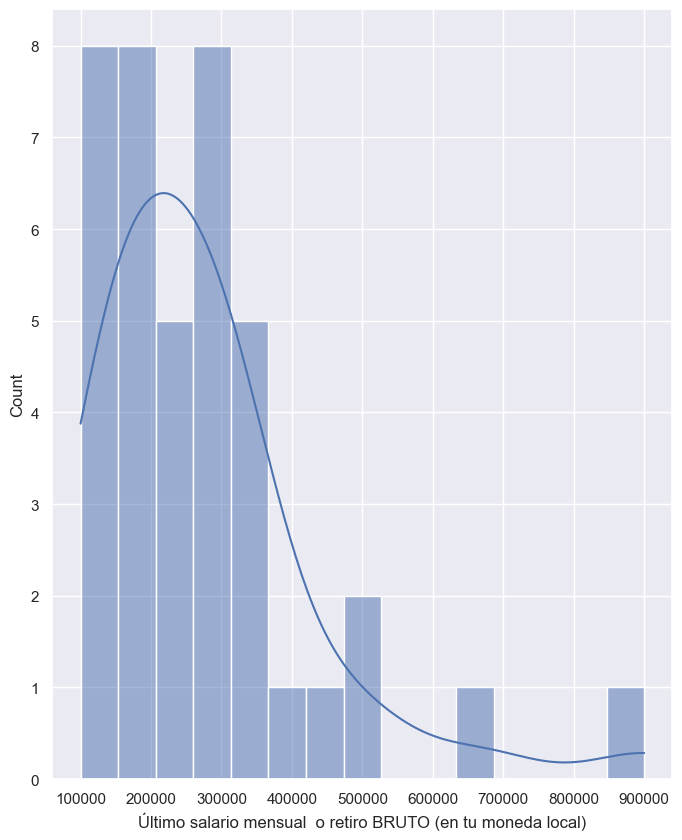

In [231]:
sns.histplot(data=scientist1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)


print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\3837127599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientist1['Años'] = np.where(scientist1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

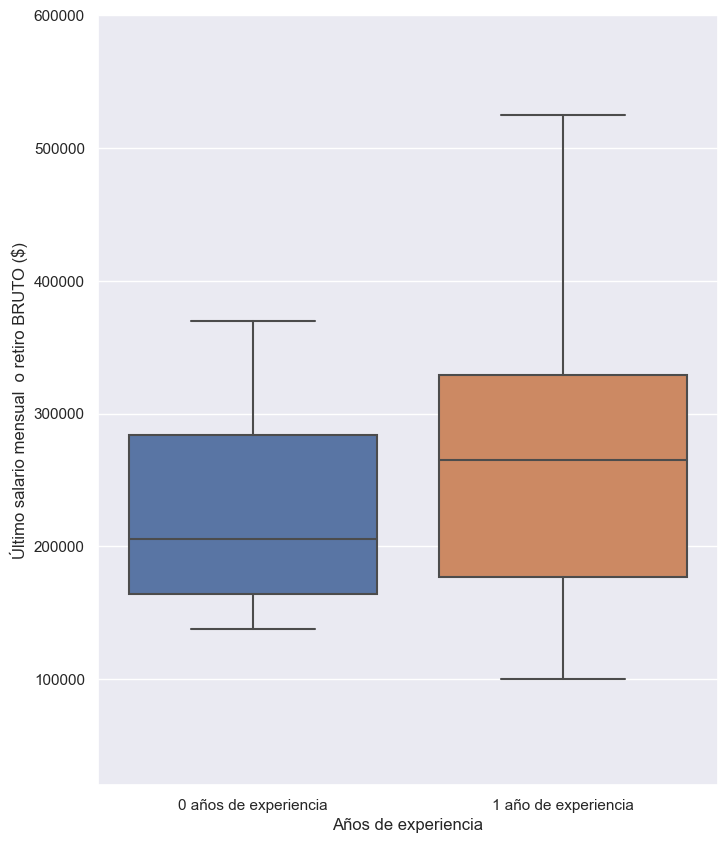

In [234]:
scientist1['Años'] = np.where(scientist1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=scientist1, order=["0 años de experiencia", "1 año de experiencia"])
ax.set(ylim=(20000, 600000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

In [209]:
df_analyst = dataframe[dataframe['Trabajo de'].str.contains('Data Analyst', na=False)]

In [210]:
analyst1 = df_analyst[df_analyst['Años de experiencia']<=1]
analyst1.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Pagos en criptomonedas,¿Qué porcentaje o monto recibís en criptomonedas?,...,Estado,Carrera,Universidad,¿Participaste de algún Boot Camp?,"Si participaste de un Boot Camp, ¿qué carrera estudiaste?",¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tengo (edad),Me identifico (género)
136,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),212000,180000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,Varón Cis
181,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),85000,85000,NaN,NaN,NaN,NaN,...,En curso,Tecnicatura en Programación,UB - Universidad de Belgrano,NaN,NaN,NaN,NaN,NaN,23,Masculino
345,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),265000,225500,NaN,NaN,NaN,NaN,...,En curso,Licenciatura en Ciencias Físicas,UBA - Universidad de Buenos Aires,NaN,NaN,No,0.0,Bruto,28,Varón Cis
365,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),250000,207000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Varón Cis
418,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),154290,139000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Mujer Cis


In [211]:
salario = reformat_salary_column(analyst1['Último salario mensual  o retiro BRUTO (en tu moneda local)'])
analyst1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario
analyst1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\4018382131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyst1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario


136     212000.0
181      85000.0
345     265000.0
365     250000.0
418     154290.0
          ...   
6247    140000.0
6459    135000.0
6506    120000.0
6530    155000.0
6586    290000.0
Name: Último salario mensual  o retiro BRUTO (en tu moneda local), Length: 72, dtype: float64

Salario medio:206222, Minimo salario: 54000.0, Maximo salario: 600000.0


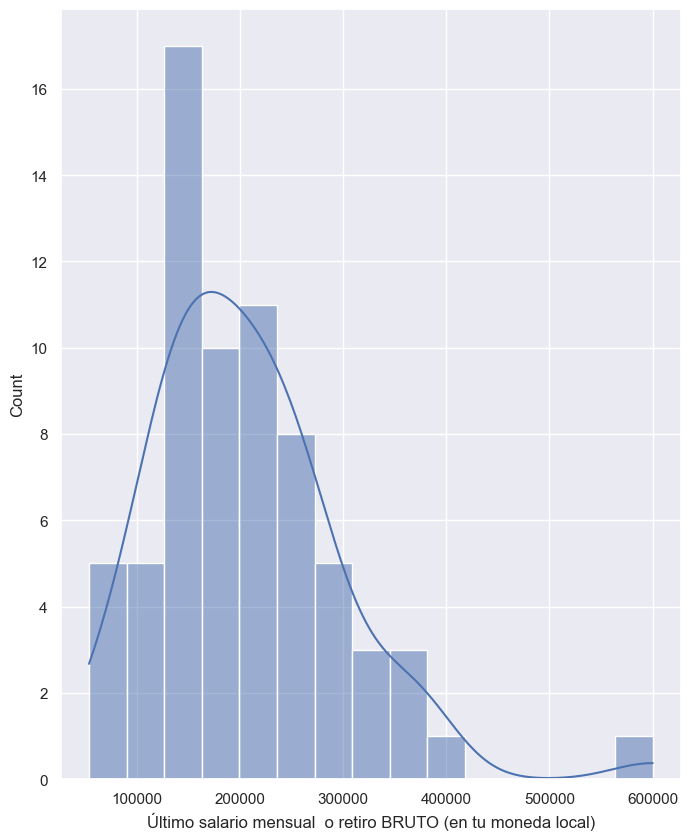

In [212]:
sns.histplot(data=analyst1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)


print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [214]:
analyst1['Años'] = np.where(analyst1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_41664\527907154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyst1['Años'] = np.where(analyst1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

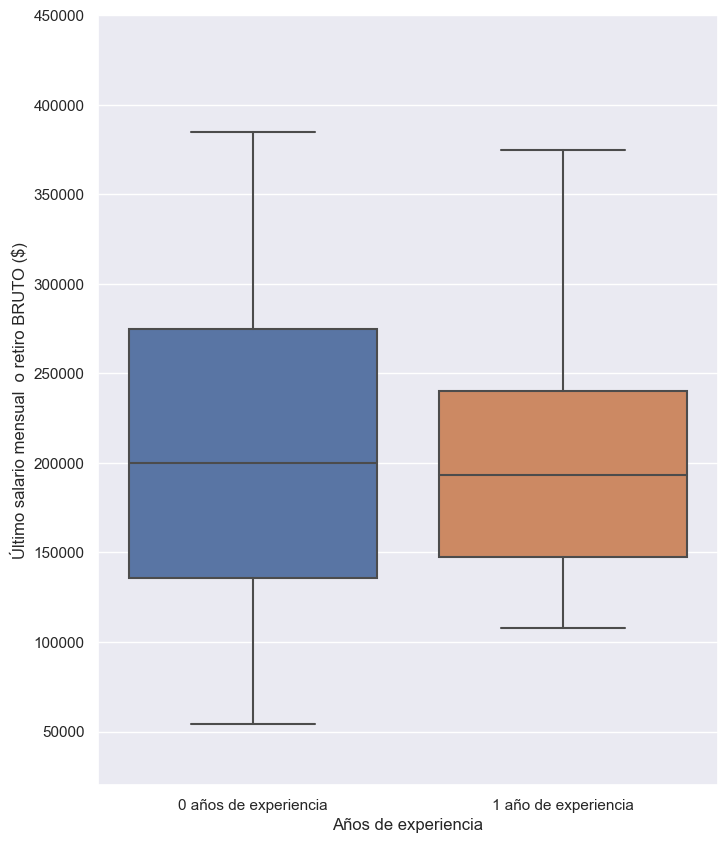

In [237]:
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=analyst1, order=["0 años de experiencia", "1 año de experiencia"])
ax.set(ylim=(20000, 450000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')